## Template for Exercise 2: Integration

This is a template for doing Exercise 2 of the MASD 2018 Exam. Please fill out the fields and function templates below, reading the data as below, in order to perform the exercise. Feel free to load extra functions, but note that built-in functions for doing the entire task are, as a general rule, not allowed.

If you are unsure how to interpret the template, or what you are allowed to do, please contact us either by email or using the Absalon forum.

In [2]:
# Importing packages -- feel free to add more, but recall that you should not use built-in 
# functions for the task at hand. If in doubt, ask us by email.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Exercise 2b: Numerical integration** 

In the cell below, please implement a numerical approximation of the integral 

$g(x) = \int_1^x \frac{1}{x} dx$

with variable step length $s$. Use your numerical approximation to compute values of the function
for $100$ evenly sampled values of $x$ between $x=1$ and $x=10$. Please plot your numerical approximation together with the known solution 

$\tilde{g}(x) = \ln x$ 

for step sizes $s=1, s=0.1$ and $s=0.01$.

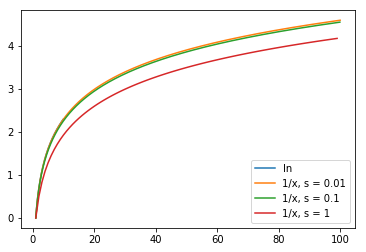

In [60]:
samples = np.arange(1.0, 10.0, 0.01)

def integrate(x, s):
    values = np.arange(1.0, x, s)
    retVal = [0]*len(values)
    for i in range(1, len(values)):
        if (i>0):
            retVal[i] = retVal[i-1] + s/values[i]
        else:
            retVal[i] = 0
    return retVal

plt.plot(samples, np.log(samples), label='ln')

# Note that when s = 0.01, it covers up ln(x), 
x = 100
s = 0.01
plt.plot(np.arange(1.0,x,s),integrate(x, s), label='1/x, s = {}'.format(s))
s = 0.1
plt.plot(np.arange(1.0,x,s),integrate(x, s), label='1/x, s = {}'.format(s))
s = 1
plt.plot(np.arange(1.0,x,s),integrate(x, s), label='1/x, s = {}'.format(s))

plt.legend()

**Exercise 2c: Numerical solution of differential equations through Euler's method**

Below, we load the tangential directions as a numpy array and use the function plot_tangents to visualize them.

We also visualize the initial starting point $\mathbf{x} = [28,20]^T$ with a black dot.

Text(0.5,1,'Tangential directions')

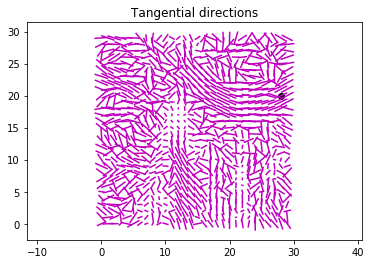

In [61]:
tangents = np.load('E2.npy')

def plot_tangents(tangents):
    ylen, xlen, d = tangents.shape
    
    for i in range(ylen):
        for j in range(xlen):
            vec = tangents[i,j]                                    
            xs = np.array([i-vec[0], i+vec[0]])
            ys = np.array([-vec[1], vec[1]]) + j
            plt.plot(xs,ys, 'm')
            
plot_tangents(tangents)       
plt.scatter([28], [20], color='black')
plt.axis('equal')
plt.title('Tangential directions')

**i)** In the cell below, please implement a function that assigns a tangential direction $[T_x(x,y), T_y(x,y)]$ to any real-valued point $[x,y]$ in the image (i.e. not just integer-valued points) by using the tangential direction corresponding to the nearest pixel. To verify that your function works, please plot the tangent at the point $[27.5, 19.5]$ as a small black line segment through the point $[27.5, 19.5]$, and visually compare your plotted direction to the directions shown near the black dot at $\mathbf{x} = [28,20]$ in Figure 1, right.

**ii)** In the cell below, please implement Euler's method to find the curve $c$ starting in the point $\mathbf{x} = [28,20]$ and tracking for $N$ steps with step length $s$. Apply your function with $N=100$ steps and step length $s=0.5$. Plot the resulting curve together with the tangential directions. What do you see?

**iii)** The tangential directions are only determined up to sign, see Figure 3 in the exam PDF. Hence, you need to determine whether you should use the given tangential vector, or whether you should multiply it by $-1$ before taking a step. You want to select the option that gives you the smallest change in direction. In the cell below, please describe how this might be done, make an updated implementation of Euler's method that considers this, apply and plot the resulting curve with the same parameters as in ii).